# [POLSCI 5] Civil Wars

Estimated Time: 30-40 Minutes <br>
Created by: Lauren Hom, Ravi Singhal

In this notebook, we will be exploring what rows and columns represent as well as analyzing some trends in the types of conflicts over time.

### Table of Contents 
1 - [Jupyter Introduction](#1) <br>
2 - [The Dataset](#2)<br>
3 - [Civil Wars](#3)<br>
4 - [Visualize the Data](#4)<br>
5 - [Bibliography](#5)

# Jupyter Introduction <a id='1'></a>

This webpage is a Jupyter Notebook. We will use this notebook to analyze the Uppsala Conflict Data Program (UCDP) Conflict Termination Dataset. Jupyter Notebooks are composed of both regular text and code cells. Code cells have a gray background. In order to run a code cell, click the cell and press `Shift + Enter` while the cell is selected or hit the `▶| Run` button in the toolbar at the top. An example of a code cell is below. Try running it. If everything works properly, the word "Success" should be printed under the cell.

In [1]:
# This cell sets up the notebook. Just run this cell.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Success!")

Success!


# The Dataset <a id='2'></a>

The dataset we will look at contains information about conflicts around world from 1946-2013. A **dataset** is a table with rows and columns that contain values. Here is the description of dateset by the author, Joadim Kreutz.

> "Armed conflict is defined by Uppsala Conflict Data Program (UCDP) \[as\] a contested incompatibility that concerns government and/or territory where the use of armed force between two parties, of which at least one is the government of a state, results in at least 25 battle-related deaths in a calender-year."

> "A conflict episode, thus, is defined as the a continuous period of active conflict years in the UCDP-PRIO armed conflict dataset. A conflict episode ends when an active year is followed by a year in which there are fewer than 25 battle-related deaths."


<br>If you want to read more about the dataset, click [here](https://www.pcr.uu.se/research/ucdp/).

<br>Here are the first 5 rows of the dataset. You can scroll horizontally when hovering over the table to see the whole data set. There are 2741 rows and 33 columns

In [2]:
raw = Table.read_table('ucdp-term-dyadic-2015.csv') # read in the dataset
raw.show(5)

ConflictId,DyadId,DyadEp,Year,Location,SideA,SideA2nd,SideB,SideBID,SideB2nd,Incompatibility,TerritoryName,IntensityLevel,TypeOfConflict,Type2,StartDate,StartPrec,StartDate2,StartPrec2,Dyadterm,EpEndDate,EpEndPrec,Outcome_early,Outcome,CfireDate,PeAgDate,GWNoA,GWNoA2nd,GWNoB,GWNoB2nd,GWNoLoc,Region,Version
1-191,1,101,1992,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1993,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1994,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,2,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1995,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,1996,Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015


As you can see, there are many columns in the dataset. The value nan (not a number) indicates not applicable or missing value. We have cleaned the dataset by removing some columns and making the values more readable. The cleaned dataset has 18 columns.

In [3]:
wars = Table.read_table('cleanedWars.csv') # read in the dataset
wars.set_format('Year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
wars.show(5)

Year,ConflictId,DyadId,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1992,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1993,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1994,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1995,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1996,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


Note that while the number of *columns* have changed in the cleaned dataset, the number of *rows* have remained the same.

## Columns
Let's dive in! <br><br>
### Location
To understand what a *column* is, let's look at a few examples. First, we shall examine the `Location` column. According to the author of the dataset, 
> "Location is defined as the government side of a conflict, and should not be interpreted as the geographical location of the conflict."

To get an idea of what kinds of values are in the `Location` column, here are the number of occurences of the 10 most common locations.

In [4]:
locations = wars.group('Location').sort('count', descending=True) # group by location and sort in descending order
locations

Location,count
Myanmar (Burma),314
India,178
Ethiopia,136
Israel,123
Philippines,121
Afghanistan,120
Colombia,93
Iraq,80
Angola,71
Sudan,70


If we look further down the table, we would see some values in the `Location` column separated by hyphens or commas, like Guinea-Bissau.

The author also tells us,
> "The string is split in two ways, hyphen (‘-‘) splits the different sides in an interstate war, and comma (‘,’) splits different countries fighting together on the same side."

A **string** is text data that shows up red in code cells. Strings are enclosed in double or single quotes. Note that numbers can appear in strings.

Let's look at the two cases the author describes.

In [5]:
# Locations with the two sides of an interstate war
locations.where('Location', are.containing('-'))

Location,count
Bosnia-Herzegovina,15
Guinea-Bissau,13


We can see there are two locations where the countries/regions are separated by a hypen ('-'). For example, the first row that contains "Bosnia-Herzegovina" indicates that there were interstate wars (war(s) between two states).

Furthermore, we see two examples of *strings*, the 'Location' string and the '-' hypen string. 


In [6]:
# Locations with countries that are fighting on the same side
locations.where('Location', are.containing(','))

Location,count
"India, Pakistan",19
"South Vietnam, Vietnam (North Vietnam)",11
"Iran, Iraq",10
"China, Vietnam (North Vietnam)",10
"North Korea, South Korea",5
"Indonesia, Malaysia",4
"Ethiopia, Somalia",4
"Egypt, Israel",4
"China, Taiwan",4
"Laos, Thailand",3


Here we can see the countries/regions that are separated by a comma (','). For example, the first row that contains "India, Pakistan" indicates that India and Pakistan fought together on the same side during a war.

Again we can see two examples of *strings*, the 'Location' string and the ',' comma string. 


### Region
Now let's look at the `Region` column. Again, first we'll look at the number of war occurrences of each region.

In [7]:
regions = wars.group('Region').sort('count', descending=True) # count occurences of each region
regions

Region,count
Asia,1141
Africa,828
Middle East,371
Americas,256
Europe,134
"Europe, Middle East",4
"Europe, Asia",4
"Europe, Middle East, Asia, Americas",1
"Europe, Americas",1
"Europe, Africa",1


Above, we can see that the first row with the 'Asia' region has the highest `count`, which means that Asia has the largest number of war occurrences in their region.

In case you were curious, the cell below is the row for the conflict that took place in Europe, Middle East, Asia, and Americas. This marks the beginning of the Iraq War in 2003. For more info, click [here](https://en.wikipedia.org/wiki/Iraq_War).

In [8]:
wars.where('Region', 'Europe, Middle East, Asia, Americas')

Year,ConflictId,DyadId,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
2003,1-226,332,"Iraq, Australia, United Kingdom, United States of America","Government of Australia, Government of United Kingdom, G ...",nan,Government of Iraq,nan,Government,nan,War (at least 1000 battle-related deaths),Interstate armed conflict,2003-03-20,4/9/03,Victory for Side A /Government Side,nan,nan,"Europe, Middle East, Asia, Americas"


### Intensity Level
Lastly, we'll look at the `IntensityLevel` column. 
>The intensity variable is coded in two categories:
>1. Minor: between 25 and 999 battle-related deaths in a given year.
>2. War: at least 1,000 battle-related deaths in a given year.

Here are the number of wars for each type of intensity level, which is represented in the `count` column.

In [9]:
wars.group('IntensityLevel') # group by IntensityLevel

IntensityLevel,count
Minor (between 25 and 999 battle-related deaths),2121
War (at least 1000 battle-related deaths),620


Let's break it down by region. First here are the counts of each `IntensityLevel` in each region.

In [10]:
wars.group(['Region', 'IntensityLevel']).sort('count', descending=True).show() # group by Region and IntensityLevel

Region,IntensityLevel,count
Asia,Minor (between 25 and 999 battle-related deaths),860
Africa,Minor (between 25 and 999 battle-related deaths),634
Middle East,Minor (between 25 and 999 battle-related deaths),298
Asia,War (at least 1000 battle-related deaths),281
Americas,Minor (between 25 and 999 battle-related deaths),223
Africa,War (at least 1000 battle-related deaths),194
Europe,Minor (between 25 and 999 battle-related deaths),99
Middle East,War (at least 1000 battle-related deaths),73
Europe,War (at least 1000 battle-related deaths),35
Americas,War (at least 1000 battle-related deaths),33


We can see that each region appears twice in the `Region` column, once for each type of intensity level. For example, in the first row we can see that Asia had 860 wars with a "Minor" intensity level and in the fourth row, we can see that Asia had 281 wars with a "War" intensity level. 

Let's look specifically at the Middle East. Here are the counts of every type of conflict in each Middle East location.

In [11]:
# filter by region, then group by location and intensity level
m_east = wars.where('Region', 'Middle East').group(['Region', 'Location', 'IntensityLevel']).sort(
    'count', descending=True)
m_east

Region,Location,IntensityLevel,count
Middle East,Israel,Minor (between 25 and 999 battle-related deaths),121
Middle East,Iraq,Minor (between 25 and 999 battle-related deaths),59
Middle East,Iran,Minor (between 25 and 999 battle-related deaths),39
Middle East,Turkey,Minor (between 25 and 999 battle-related deaths),25
Middle East,Iraq,War (at least 1000 battle-related deaths),21
Middle East,Yemen (North Yemen),Minor (between 25 and 999 battle-related deaths),12
Middle East,Lebanon,Minor (between 25 and 999 battle-related deaths),11
Middle East,Yemen (North Yemen),War (at least 1000 battle-related deaths),10
Middle East,"Iran, Iraq",War (at least 1000 battle-related deaths),9
Middle East,Turkey,War (at least 1000 battle-related deaths),8


We can see that the greatest number ‘Minor’ war occurences happened in Israel (121 in total) while the great number of ‘war’ wars happened in Iraq (21 in total). The two rows that show this information from the dataset above are shown below.

In [27]:
m_east.take(0) #first row of the dataset, above

Region,Location,IntensityLevel,count
Middle East,Israel,Minor (between 25 and 999 battle-related deaths),121


In [28]:
m_east.take(4) #fifth row of the dataset, above

Region,Location,IntensityLevel,count
Middle East,Iraq,War (at least 1000 battle-related deaths),21


Lastly, here are the Middle East locations with the most wars.

In [12]:
m_east.where('IntensityLevel', are.containing('War')) # filter to just show war rows

Region,Location,IntensityLevel,count
Middle East,Iraq,War (at least 1000 battle-related deaths),21
Middle East,Yemen (North Yemen),War (at least 1000 battle-related deaths),10
Middle East,"Iran, Iraq",War (at least 1000 battle-related deaths),9
Middle East,Turkey,War (at least 1000 battle-related deaths),8
Middle East,Lebanon,War (at least 1000 battle-related deaths),5
Middle East,Iran,War (at least 1000 battle-related deaths),5
Middle East,Syria,War (at least 1000 battle-related deaths),4
Middle East,"Israel, Syria",War (at least 1000 battle-related deaths),2
Middle East,Israel,War (at least 1000 battle-related deaths),2
Middle East,"Iraq, Kuwait",War (at least 1000 battle-related deaths),2


Again, we can see that the greatest number of war occurences with a 'War' intensity level was Iraq (21 in total), followed by Yemen (North Yemen), and interstate war occurences between Iran and Iraq.  

## Rows
Next, let's examine what a *row* is. Here is the first row of the dataset.

In [13]:
wars.take(0) # take the first row

Year,ConflictId,DyadId,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1992,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


This row gives us information about a specific conflict happening in Algeria in the year 1992. One thing to note is that the `IntensityLevel` of the conflict during this year is Minor. As described in the `IntensityLevel` column, a Minor conflict indicates a war where there were between 25-999 battle-related deaths. 

In [14]:
wars.take(2) # take the third row

Year,ConflictId,DyadId,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1994,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


In comparison, by looking at the third row of the dataset, we can see that the same conflict has now changed to have an `IntensityLevel` of War in the year 1994. We know that the first and third rows correspond to the same conflict because the `ConflictId`s are the same. Each row of this dataset describes one year of one conflict.

# Civil Wars <a id='3'></a>
In this section, we will do further analysis on civil war occurrences. Here is the original dataset again.

In [15]:
wars.show(5)

Year,ConflictId,DyadId,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1992,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1993,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1994,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1995,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1996,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


Let's look specifically at civil wars. To do so, we will filter the dataset to select conflicts that are only internal (civil wars).

In [16]:
civil_wars = wars.where('TypeOfConflict', 'Internal armed conflict') # remove all non civil war rows
civil_wars.show(5)

Year,ConflictId,DyadId,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1992,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1993,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1994,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1995,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1996,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


Notice the change in the number of rows when we remove all the rows that do not correspond to civil wars.

In [17]:
print("The original dataset has {} rows. \n\
After removing all non civil war rows, the dataset has {} rows left.".format(wars.num_rows, civil_wars.num_rows))

The original dataset has 2741 rows. 
After removing all non civil war rows, the dataset has 2091 rows left.


First, let's find which years had the most civil wars. In case you're curious about the wars in a particular year, here is [list of civil wars](https://en.wikipedia.org/wiki/List_of_civil_wars).

In [18]:
years = civil_wars.group('Year').sort('count', descending = True) # count number of occurences of each year
years.set_format('Year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
years

Year,count
1991,62
1990,60
1994,56
1992,52
1997,48
1993,46
1996,45
1989,45
1987,45
1986,44


Let's make a bar graph of the `IntensityLevel` for a particular year. Replace the `...` in the first line of the code cell below with a year.

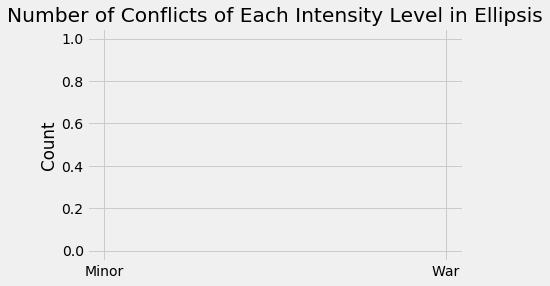

In [26]:
year = ... # replace the ... with a year, for example 1991

# filter data by chosen year and group by intensity level
one_year = civil_wars.where('Year', year).group('IntensityLevel').sort('IntensityLevel')
plt.bar(one_year.column('IntensityLevel'), one_year.column('count')) # create bar graph
plt.xticks((0, 1), ('Minor', 'War')) # set x axis labels to be Minor and War
plt.ylabel("Count") # set y axis label
plt.title('Number of Conflicts of Each Intensity Level in {}'.format(year)) # set title of graph
plt.show()

Next, we're going to examine the `Outcome` of the civil wars. Here are all the possible values in the `Outcome` column.

In [20]:
list(set(civil_wars.column('Outcome')))

['Peace agreement',
 'Ceasefire',
 'Actor ceases to exist',
 'nan',
 'Low activity (less than 25 battle-deaths)',
 'Victory for Side B /Rebel Side',
 'Victory for Side A /Government Side']

The nan value is a little confusing. Let's replace it with something more informative. In the code cell below, replace the `...` with an informative value. Remember, in this dataset, nan means the conflict did not terminate in this year.

After running the cell, scroll the table all the way to the right to see the new column we created, `Termination Type`.

In [30]:
# Replace the ... with a new value. leave the quotes, only replacing the ...
# The new line should look something like this
# new_value = 'some text'
new_value = '...' 

new_column = np.where(civil_wars.column('Outcome') == 'nan', new_value, civil_wars.column('Outcome'))

with_termination = civil_wars.with_column('Termination Type', new_column)
with_termination.show(5)

Year,ConflictId,DyadId,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region,Termination Type
1992,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa,...
1993,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa,...
1994,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa,...
1995,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa,...
1996,1-191,1,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa,...


Now we can see all of the the Termination Types in the dataset, where the "nan" values are replaced by your  informative value.

In [33]:
with_termination.group('Termination Type')

Termination Type,count
...,1533
Actor ceases to exist,50
Ceasefire,64
Low activity (less than 25 battle-deaths),232
Peace agreement,62
Victory for Side A /Government Side,105
Victory for Side B /Rebel Side,45


A summary of what the remaining Termination Types mean are below: 

- **Actor ceases to exist** -- War activity continues with at least one party no longer existing or becoming a different type of party. For states, this means that the state became part of another country or a central government was no longer obvious. For rebel organizations, this means that the organization changed their name along with altering their alliances or territorial goals
- **Ceasefire** -- Fighting stops, but not necessarily with any resolution. 
- **Low activity (less than 25 battle-deaths)** -- War activity may continue, but fatality rates are below the fatality level defined by the authors of the dataset
- **Peace agreement** -- An agreement signed by opposing sides to formally end the war. 
- **Victory for Side A/Government Side** -- The government side of the war wins and the rebel side loses
- **Victory for Side A/Rebel Side** -- The rebel side wins and the government side loses 

# Visualize the Data <a id='4'></a>

Here is a bar graph of the outcomes of all the civil wars in the dataset.

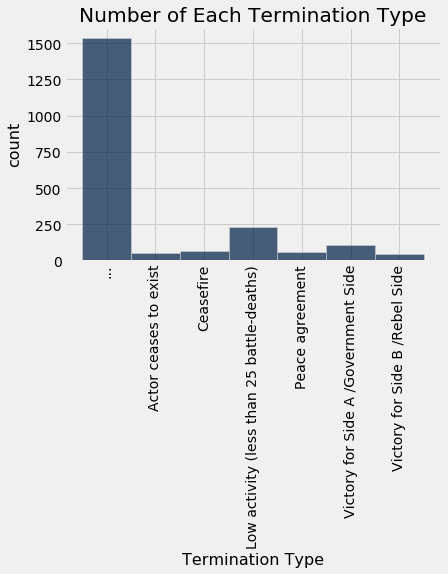

In [22]:
termination_count = with_termination.group('Termination Type') # count number of each termination type
termination_count.bar('Termination Type') # generate bar graph
plt.xticks(rotation=90) # make x axis labels vertical
plt.title("Number of Each Termination Type") # title graph
plt.show()

Here is the same graph, but zoomed in so we can focus on the last 6 bars. Notice the change in the y axis.

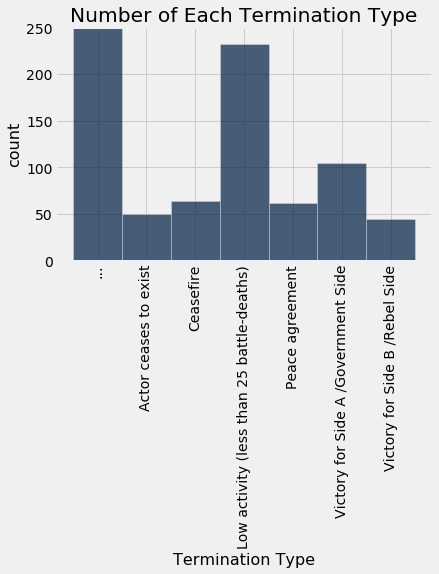

In [23]:
termination_count.bar('Termination Type') # generate bar graph
plt.xticks(rotation=90) # make x axis labels vertical
plt.title("Number of Each Termination Type") # title graph
plt.ylim(0, 250) # show graph from y = 0 to 250
plt.show()

Now let's visualize how the number of civil wars varies over time. This line graph shows the number of civil wars in each year. You'll notice the spike in the number of wars during the 1990s.

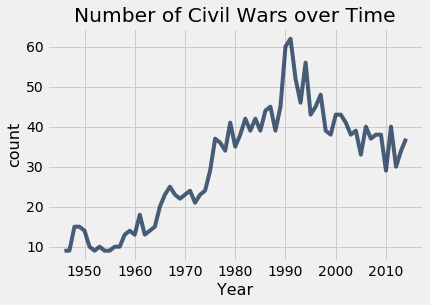

In [24]:
civil_trend = civil_wars.group('Year') # count number of civil wars per year

civil_trend.plot('Year') # generate line graph
plt.title("Number of Civil Wars over Time") # title graph
plt.show()

We hope you enjoyed this notebook and learned a few things! In case you wish to explore the dataset more on your own, here is the link to download the dataset: https://ucdp.uu.se/downloads/#d5.

# Bibliography <a id='5'></a>
* Kreutz, Joakim, 2010. How and When Armed Conflicts End: Introducing the UCDP Conflict Termination Dataset. *Journal of Peace Research* 47(2): 243-250.